In [1]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
X, y = iris.data, iris.target

In [16]:
print(iris.target_names)
print("---------------------")
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
---------------------
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [21]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [22]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
X.shape, y.shape    

((150, 4), (150,))

In [3]:
svm_classifier = SVC(kernel='linear')

In [9]:
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

We are using 5-Fold Cross-Validation, so the data will be split into 5 equal folds:

Fold 1: 30 samples  
Fold 2: 30 samples  
Fold 3: 30 samples  
Fold 4: 30 samples  
Fold 5: 30 samples  


What Happens During Each Iteration?
You perform 5 iterations. In each iteration:

1 fold is used as the Validation Set and remaining 4 folds are combined into the Training Set

✅ Iteration 1:
Training Set = Fold 2 + Fold 3 + Fold 4 + Fold 5 → 120 samples

Validation Set = Fold 1 → 30 samples

✅ Iteration 2:
Training Set = Fold 1 + Fold 3 + Fold 4 + Fold 5 → 120 samples

Validation Set = Fold 2 → 30 samples

✅ Iteration 3:
Training Set = Fold 1 + Fold 2 + Fold 4 + Fold 5 → 120 samples

Validation Set = Fold 3 → 30 samples

✅ Iteration 4:
Training Set = Fold 1 + Fold 2 + Fold 3 + Fold 5 → 120 samples

Validation Set = Fold 4 → 30 samples

✅ Iteration 5:
Training Set = Fold 1 + Fold 2 + Fold 3 + Fold 4 → 120 samples

Validation Set = Fold 5 → 30 samples

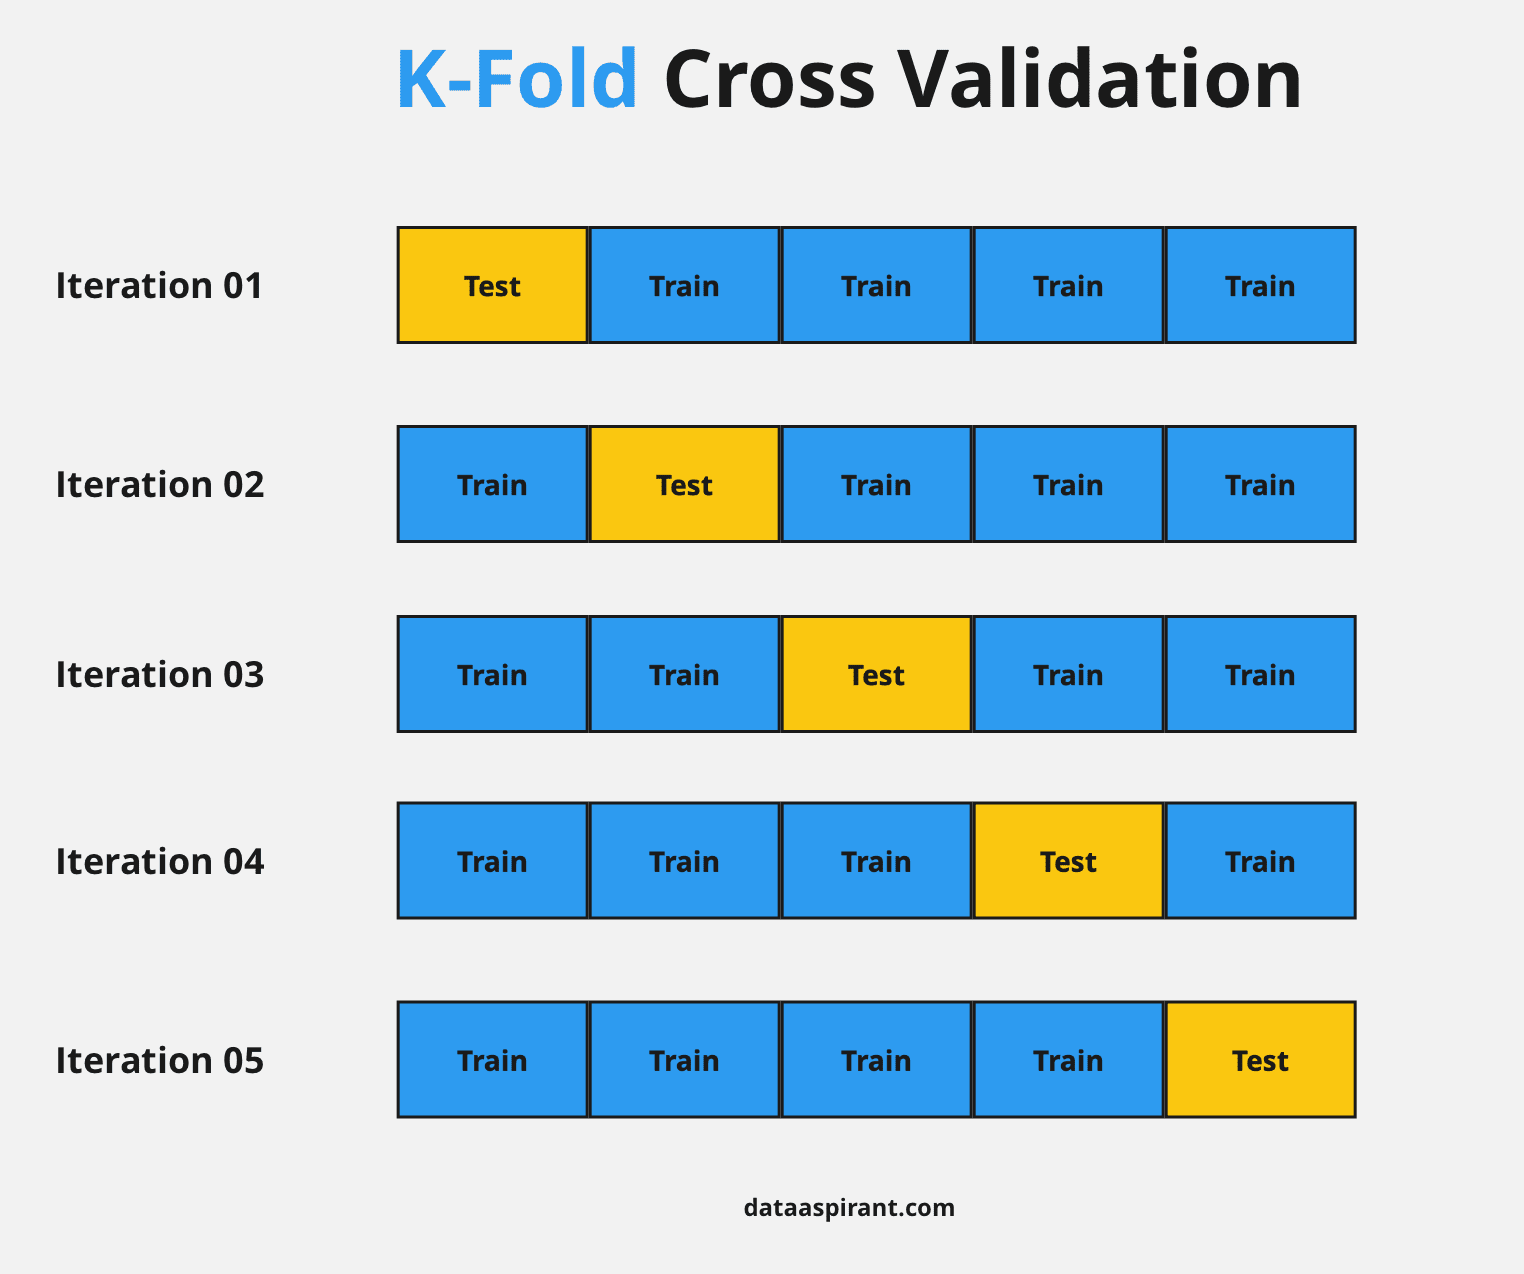

In [5]:
cross_val_results = cross_val_score(svm_classifier, X, y, cv=kf)

In [7]:
cross_val_results 

array([1.        , 1.        , 0.96666667, 0.93333333, 0.96666667])

You have 5 validation scores (accuracies).

You take the average of these scores to get your model’s mean accuracy.

In [6]:
print("Cross-Validation Results (Accuracy):")
for i, result in enumerate(cross_val_results, 1):
    print(f"  Fold {i}: {result * 100:.2f}%")
    
print(f'Mean Accuracy: {cross_val_results.mean()* 100:.2f}%')

Cross-Validation Results (Accuracy):
  Fold 1: 100.00%
  Fold 2: 100.00%
  Fold 3: 96.67%
  Fold 4: 93.33%
  Fold 5: 96.67%
Mean Accuracy: 97.33%
